In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('./sample_submission.csv')

In [3]:
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [4]:
test.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [5]:
sample_submission.head()

,num_date_time,answer
0,1_20220825 00,0
1,1_20220825 01,0
2,1_20220825 02,0
3,1_20220825 03,0
4,1_20220825 04,0


In [6]:
train.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)'],
      dtype='object')

In [7]:
train.shape

(204000, 10)

In [8]:
train['일사(MJ/m2)'].isnull().sum()

87913

In [9]:
train['강수량(mm)'].isnull().sum()

160069

In [10]:
train['일조(hr)'].isnull().sum()

75182

In [11]:
building = pd.read_csv('./building_info.csv')

In [12]:
building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [13]:
# 데이터 전처리
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [14]:
train.isnull().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
dtype: int64

In [15]:
# NaN인 것은 0으로 처리
train = train.fillna(0)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         204000 non-null  float64
 8   일사(MJ/m2)      204000 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


In [17]:
# 일시 : 시간으로 데이터타입 변경
train['일시'] = pd.to_datetime(train['일시'])

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   num_date_time  204000 non-null  object        
 1   건물번호           204000 non-null  int64         
 2   일시             204000 non-null  datetime64[ns]
 3   기온(C)          204000 non-null  float64       
 4   강수량(mm)        204000 non-null  float64       
 5   풍속(m/s)        204000 non-null  float64       
 6   습도(%)          204000 non-null  float64       
 7   일조(hr)         204000 non-null  float64       
 8   일사(MJ/m2)      204000 non-null  float64       
 9   전력소비량(kWh)     204000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 15.6+ MB


In [19]:
#num_date_time열은 건물번호와 일시 열로 정보 반영가능하므로 제거해도 될듯
train = train.drop(['num_date_time'], axis=1)

In [20]:
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40
...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08


In [21]:
# train은 데이터 전처리 완료
# test도 동일한 데이터 전처리 적용
test.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77


In [22]:
test['일시'] = pd.to_datetime(test['일시'])
test = test.drop(['num_date_time'], axis=1)

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   건물번호     16800 non-null  int64         
 1   일시       16800 non-null  datetime64[ns]
 2   기온(C)    16800 non-null  float64       
 3   강수량(mm)  16800 non-null  float64       
 4   풍속(m/s)  16800 non-null  float64       
 5   습도(%)    16800 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 787.6 KB


In [24]:
test.isnull().sum()

건물번호       0
일시         0
기온(C)      0
강수량(mm)    0
풍속(m/s)    0
습도(%)      0
dtype: int64

In [25]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   건물번호          100 non-null    int64  
 1   건물유형          100 non-null    object 
 2   연면적(m2)       100 non-null    float64
 3   냉방면적(m2)      100 non-null    float64
 4   태양광용량(kW)     100 non-null    object 
 5   ESS저장용량(kWh)  100 non-null    object 
 6   PCS용량(kW)     100 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [26]:
building.head()
# ess : 남는 전력을 따로 저장했다가 필요시에 공급하는 형태
# pcs : 전력변환장치

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [27]:
building['태양광용량(kW)'].value_counts()
# -는 0으로 바꾸자

-         64
25         2
20         2
50         2
200        2
28.44      1
3          1
9.45       1
365        1
14.4       1
65         1
95         1
60.45      1
621        1
100        1
97.85      1
98.28      1
46.2       1
35         1
100.56     1
40         1
83.72      1
30         1
26.64      1
97.65      1
110        1
70         1
64.8       1
56         1
130.6      1
447.2      1
60         1
21.6       1
Name: 태양광용량(kW), dtype: int64

In [28]:
building['ESS저장용량(kWh)'].value_counts()

-        95
2557      1
800       1
1362      1
837.1     1
3100      1
Name: ESS저장용량(kWh), dtype: int64

In [29]:
building['PCS용량(kW)'].value_counts()

-       95
500      2
1000     1
300      1
800      1
Name: PCS용량(kW), dtype: int64

In [30]:
building['태양광용량(kW)'][building['태양광용량(kW)']=='-']=0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28128\3784538752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building['태양광용량(kW)'][building['태양광용량(kW)']=='-']=0


In [31]:
building['태양광용량(kW)'].value_counts()

0         64
25         2
20         2
50         2
200        2
28.44      1
3          1
9.45       1
365        1
14.4       1
65         1
95         1
60.45      1
621        1
100        1
97.85      1
98.28      1
46.2       1
35         1
100.56     1
40         1
83.72      1
30         1
26.64      1
97.65      1
110        1
70         1
64.8       1
56         1
130.6      1
447.2      1
60         1
21.6       1
Name: 태양광용량(kW), dtype: int64

In [32]:
building['ESS저장용량(kWh)'][building['ESS저장용량(kWh)']=='-']=0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28128\152263288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building['ESS저장용량(kWh)'][building['ESS저장용량(kWh)']=='-']=0


In [33]:
building['PCS용량(kW)'][building['PCS용량(kW)']=='-']=0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28128\3419152574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  building['PCS용량(kW)'][building['PCS용량(kW)']=='-']=0


In [34]:
#building의 건물종류는 one-hot encoding해야할듯
building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,0,0,0
1,2,건물기타,122233.47,99000.00,0,0,0
2,3,건물기타,171243.00,113950.00,40,0,0
3,4,건물기타,74312.98,34419.62,60,0,0
4,5,건물기타,205884.00,150000.00,0,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,0,0,0
96,97,호텔및리조트,55144.67,25880.00,0,0,0
97,98,호텔및리조트,53578.62,17373.75,0,0,0
98,99,호텔및리조트,53499.00,40636.00,0,0,0


In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
building_type = ohe.fit_transform(building[['건물유형']])
building_type

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [36]:
ohe.categories_

[array(['건물기타', '공공', '대학교', '데이터센터', '백화점및아울렛', '병원', '상용', '아파트', '연구소',
        '지식산업센터', '할인마트', '호텔및리조트'], dtype=object)]

In [37]:
pd.DataFrame(building_type, columns=[col for col in ohe.categories_[0]])

,건물기타,공공,대학교,데이터센터,백화점및아울렛,병원,상용,아파트,연구소,지식산업센터,할인마트,호텔및리조트
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
building_new = pd.concat([building.drop(columns=['건물유형']), pd.DataFrame(building_type, columns=[col for col in ohe.categories_[0]])], axis=1)

In [39]:
building_new

,건물번호,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),건물기타,공공,대학교,데이터센터,백화점및아울렛,병원,상용,아파트,연구소,지식산업센터,할인마트,호텔및리조트
0,1,110634.00,39570.00,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,122233.47,99000.00,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,171243.00,113950.00,40,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,74312.98,34419.62,60,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,205884.00,150000.00,0,2557,1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,93314.00,60500.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,97,55144.67,25880.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,98,53578.62,17373.75,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,99,53499.00,40636.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
test

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1,2022-08-25 00:00:00,23.5,0.0,2.2,72
1,1,2022-08-25 01:00:00,23.0,0.0,0.9,72
2,1,2022-08-25 02:00:00,22.7,0.0,1.5,75
3,1,2022-08-25 03:00:00,22.1,0.0,1.3,78
4,1,2022-08-25 04:00:00,21.8,0.0,1.0,77
...,...,...,...,...,...,...
16795,100,2022-08-31 19:00:00,22.5,0.0,0.9,84
16796,100,2022-08-31 20:00:00,20.7,0.0,0.4,95
16797,100,2022-08-31 21:00:00,20.2,0.0,0.4,98
16798,100,2022-08-31 22:00:00,20.1,0.0,1.1,97


In [41]:
#train 에는 풍속, 습도 데이터 존재
#test 에는 풍속 습도 데이터 없음
# 기온, 강수량, 풍속, 습도 -> 일조, 일사 예측
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40
...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08


In [42]:
# 칼럼 재설정
train_df = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test_df = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})

In [43]:
test_df

,building_number,date_time,temperature,rainfall,windspeed,humidity
0,1,2022-08-25 00:00:00,23.5,0.0,2.2,72
1,1,2022-08-25 01:00:00,23.0,0.0,0.9,72
2,1,2022-08-25 02:00:00,22.7,0.0,1.5,75
3,1,2022-08-25 03:00:00,22.1,0.0,1.3,78
4,1,2022-08-25 04:00:00,21.8,0.0,1.0,77
...,...,...,...,...,...,...
16795,100,2022-08-31 19:00:00,22.5,0.0,0.9,84
16796,100,2022-08-31 20:00:00,20.7,0.0,0.4,95
16797,100,2022-08-31 21:00:00,20.2,0.0,0.4,98
16798,100,2022-08-31 22:00:00,20.1,0.0,1.1,97


In [44]:
building_info = building_new.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity',
    '건물기타': 'type_etc',
    '공공':'type_public',
    '대학교':'type_univ',
    '데이터센터':'type_data',
    '백화점및아울렛':'type_outlet',
    '병원':'type_hosp',
    '상용':'type_commercial',
    '아파트':'type_apart',
    '연구소':'type_research',
    '지식산업센터':'type_intcenter',
    '할인마트':'type_mart',
    '호텔및리조트':'type_hotel'
})

In [45]:
building_info

,building_number,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,type_etc,type_public,type_univ,type_data,type_outlet,type_hosp,type_commercial,type_apart,type_research,type_intcenter,type_mart,type_hotel
0,1,110634.00,39570.00,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,122233.47,99000.00,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,171243.00,113950.00,40,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,74312.98,34419.62,60,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,205884.00,150000.00,0,2557,1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,93314.00,60500.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
96,97,55144.67,25880.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,98,53578.62,17373.75,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
98,99,53499.00,40636.00,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
train_df = pd.merge(train_df, building_info, on='building_number',how='left')
test_df = pd.merge(test_df, building_info, on='building_number',how='left')

In [47]:
train_df

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,total_area,...,type_univ,type_data,type_outlet,type_hosp,type_commercial,type_apart,type_research,type_intcenter,type_mart,type_hotel
0,1,2022-06-01 00:00:00,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,110634.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2022-06-01 01:00:00,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,110634.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2022-06-01 02:00:00,17.7,0.0,1.5,45.0,0.0,0.0,974.88,110634.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2022-06-01 03:00:00,16.7,0.0,1.4,48.0,0.0,0.0,953.76,110634.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2022-06-01 04:00:00,18.4,0.0,2.8,43.0,0.0,0.0,986.40,110634.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,0.0,0.9,86.0,0.5,0.0,881.04,57497.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203996,100,2022-08-24 20:00:00,22.4,0.0,1.3,86.0,0.0,0.0,798.96,57497.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203997,100,2022-08-24 21:00:00,21.3,0.0,1.0,92.0,0.0,0.0,825.12,57497.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
203998,100,2022-08-24 22:00:00,21.0,0.0,0.3,94.0,0.0,0.0,640.08,57497.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
train_df.isna().sum()

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
sunshine                0
solar_radiation         0
power_consumption       0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
type_etc                0
type_public             0
type_univ               0
type_data               0
type_outlet             0
type_hosp               0
type_commercial         0
type_apart              0
type_research           0
type_intcenter          0
type_mart               0
type_hotel              0
dtype: int64

In [49]:
test_df.isna().sum()

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
type_etc                0
type_public             0
type_univ               0
type_data               0
type_outlet             0
type_hosp               0
type_commercial         0
type_apart              0
type_research           0
type_intcenter          0
type_mart               0
type_hotel              0
dtype: int64

In [50]:
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year

In [51]:
prep_train = train_df.drop(['building_number','date_time'],axis=1)

In [52]:
test_df['hour'] = test_df['date_time'].dt.hour
test_df['day'] = test_df['date_time'].dt.day
test_df['month'] = test_df['date_time'].dt.month
test_df['year'] = test_df['date_time'].dt.year

In [53]:
prep_test = test_df.drop(['building_number','date_time'], axis=1)

In [54]:
prep_test

,temperature,rainfall,windspeed,humidity,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,type_etc,...,type_commercial,type_apart,type_research,type_intcenter,type_mart,type_hotel,hour,day,month,year
0,23.5,0.0,2.2,72,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,25,8,2022
1,23.0,0.0,0.9,72,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25,8,2022
2,22.7,0.0,1.5,75,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,25,8,2022
3,22.1,0.0,1.3,78,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,25,8,2022
4,21.8,0.0,1.0,77,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,25,8,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,22.5,0.0,0.9,84,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,19,31,8,2022
16796,20.7,0.0,0.4,95,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,20,31,8,2022
16797,20.2,0.0,0.4,98,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,21,31,8,2022
16798,20.1,0.0,1.1,97,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,22,31,8,2022


In [55]:
prep_train

,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,total_area,cooling_area,solar_power_capacity,...,type_commercial,type_apart,type_research,type_intcenter,type_mart,type_hotel,hour,day,month,year
0,18.6,0.0,0.9,42.0,0.0,0.0,1085.28,110634.00,39570.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,6,2022
1,18.0,0.0,1.1,45.0,0.0,0.0,1047.36,110634.00,39570.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,6,2022
2,17.7,0.0,1.5,45.0,0.0,0.0,974.88,110634.00,39570.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,6,2022
3,16.7,0.0,1.4,48.0,0.0,0.0,953.76,110634.00,39570.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1,6,2022
4,18.4,0.0,2.8,43.0,0.0,0.0,986.40,110634.00,39570.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,23.1,0.0,0.9,86.0,0.5,0.0,881.04,57497.84,40035.23,0,...,0.0,0.0,0.0,0.0,0.0,1.0,19,24,8,2022
203996,22.4,0.0,1.3,86.0,0.0,0.0,798.96,57497.84,40035.23,0,...,0.0,0.0,0.0,0.0,0.0,1.0,20,24,8,2022
203997,21.3,0.0,1.0,92.0,0.0,0.0,825.12,57497.84,40035.23,0,...,0.0,0.0,0.0,0.0,0.0,1.0,21,24,8,2022
203998,21.0,0.0,0.3,94.0,0.0,0.0,640.08,57497.84,40035.23,0,...,0.0,0.0,0.0,0.0,0.0,1.0,22,24,8,2022


In [56]:
#sunshine과 solar_radiation column제거하기 : 어차피 다른 열들로 예측을 하면 큰 차이 없을듯
prep_train = prep_train.drop(['sunshine','solar_radiation'], axis=1)

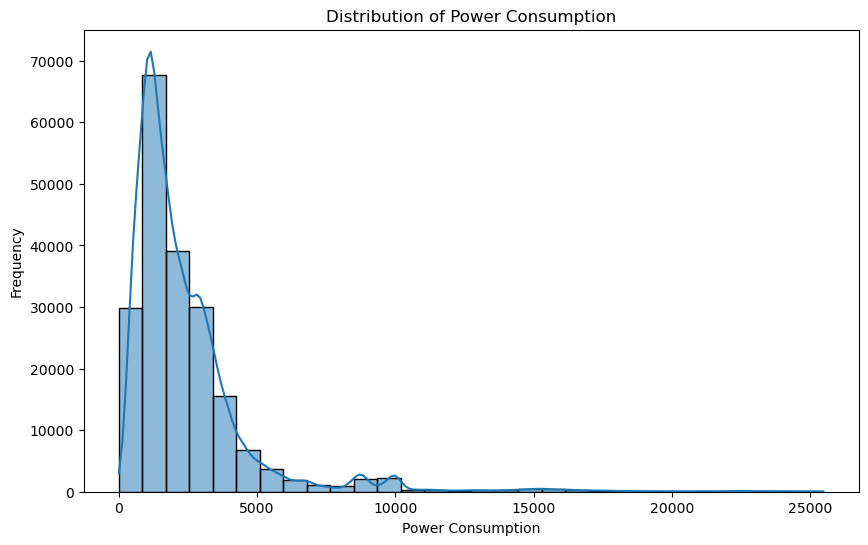

In [57]:
##https://dacon.io/competitions/official/236125/codeshare/8500?page=3&dtype=recent 이거 먼저
# https://dacon.io/competitions/official/236125/codeshare/8782?page=1&dtype=recent 참고하기
#우선 데이터 시각화 먼저해보자
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(train_df['power_consumption'], bins=30, kde=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.show()

In [58]:
#년 기준 일 평균 소비전력
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear #연기준 몇번째 일
mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()
#년 기준 시간 평균 소비 전력
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear-1)*24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()
# 월 평균 소비 전력
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()
# 시간 평균 소비 전력
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()
# 일평균 소비전력
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()

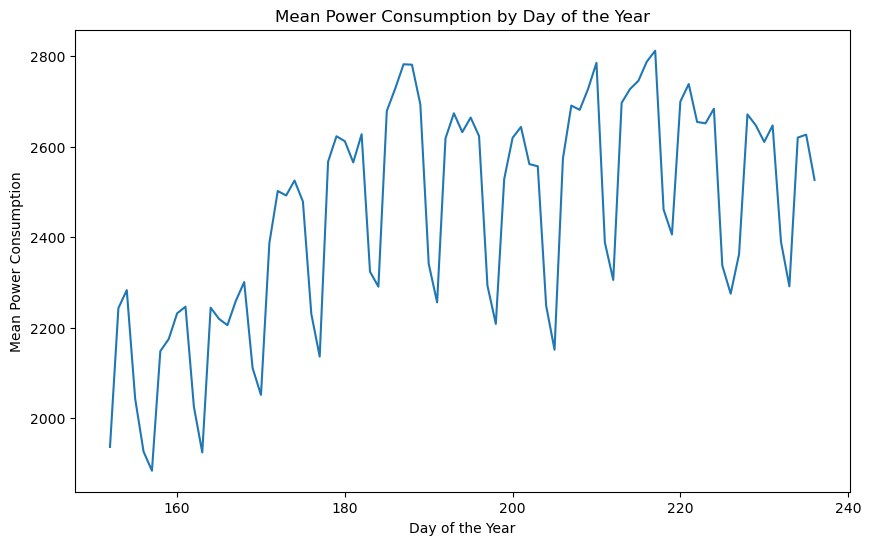

In [59]:
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_power_by_day_of_year.index, y=mean_power_by_day_of_year.values)
plt.title('Mean Power Consumption by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

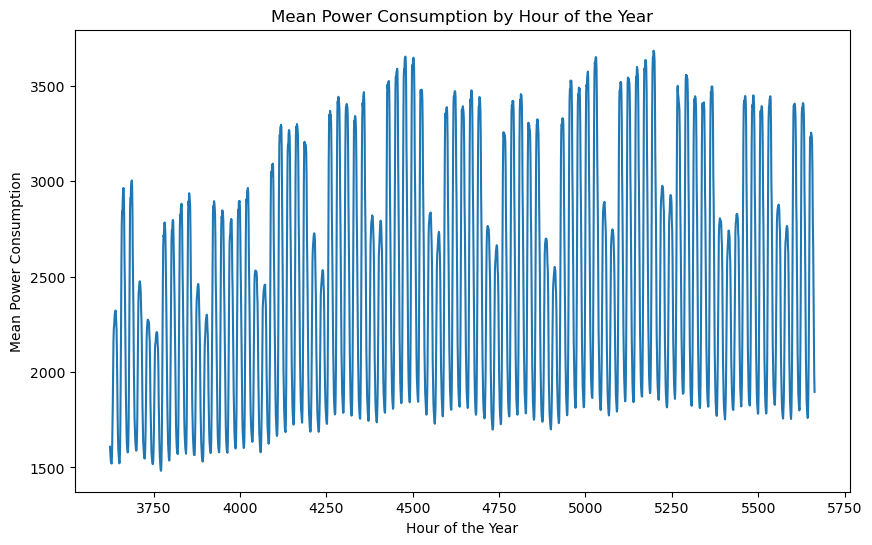

In [60]:
plt.figure(figsize=(10,6))
sns.lineplot(x=mean_power_by_hour_of_year.index, y = mean_power_by_hour_of_year.values)
plt.title('Mean Power Consumption by Hour of the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

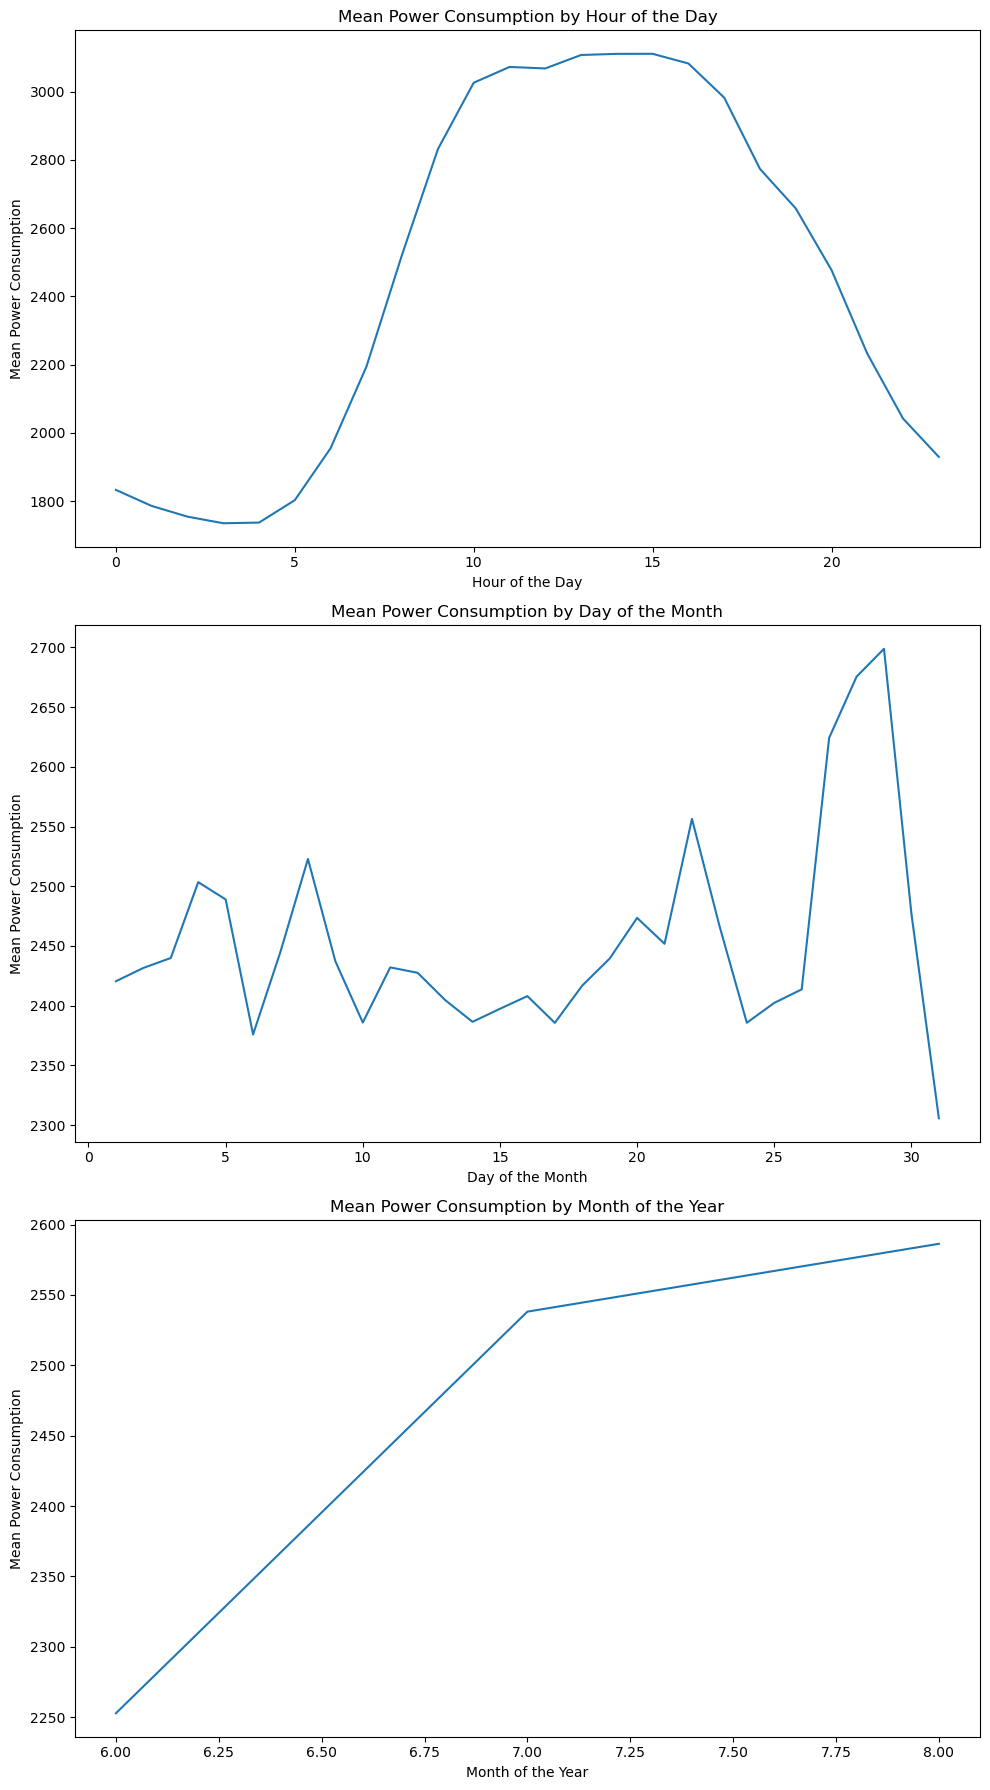

In [61]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('Mean Power Consumption by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
axs[1].set_title('Mean Power Consumption by Day of the Month')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('Mean Power Consumption by Month of the Year')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

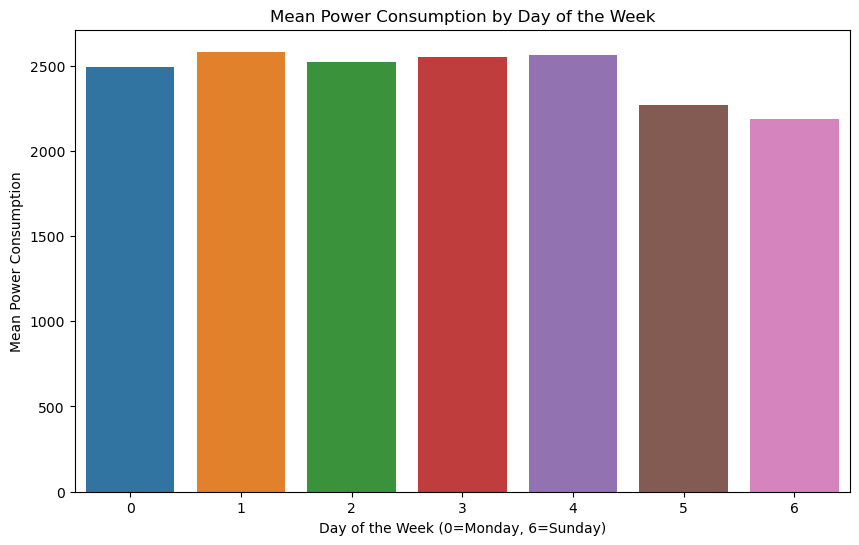

In [62]:
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek

#요일별 전력평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('Mean Power Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Mean Power Consumption')
plt.show()

In [64]:
prep_train

,temperature,rainfall,windspeed,humidity,power_consumption,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,...,type_commercial,type_apart,type_research,type_intcenter,type_mart,type_hotel,hour,day,month,year
0,18.6,0.0,0.9,42.0,1085.28,110634.00,39570.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,6,2022
1,18.0,0.0,1.1,45.0,1047.36,110634.00,39570.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,6,2022
2,17.7,0.0,1.5,45.0,974.88,110634.00,39570.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,1,6,2022
3,16.7,0.0,1.4,48.0,953.76,110634.00,39570.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,1,6,2022
4,18.4,0.0,2.8,43.0,986.40,110634.00,39570.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,23.1,0.0,0.9,86.0,881.04,57497.84,40035.23,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,19,24,8,2022
203996,22.4,0.0,1.3,86.0,798.96,57497.84,40035.23,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,20,24,8,2022
203997,21.3,0.0,1.0,92.0,825.12,57497.84,40035.23,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,21,24,8,2022
203998,21.0,0.0,0.3,94.0,640.08,57497.84,40035.23,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,22,24,8,2022


In [65]:
prep_test

,temperature,rainfall,windspeed,humidity,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity,type_etc,...,type_commercial,type_apart,type_research,type_intcenter,type_mart,type_hotel,hour,day,month,year
0,23.5,0.0,2.2,72,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,25,8,2022
1,23.0,0.0,0.9,72,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,25,8,2022
2,22.7,0.0,1.5,75,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,25,8,2022
3,22.1,0.0,1.3,78,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,25,8,2022
4,21.8,0.0,1.0,77,110634.00,39570.00,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,25,8,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,22.5,0.0,0.9,84,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,19,31,8,2022
16796,20.7,0.0,0.4,95,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,20,31,8,2022
16797,20.2,0.0,0.4,98,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,21,31,8,2022
16798,20.1,0.0,1.1,97,57497.84,40035.23,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,22,31,8,2022


In [68]:
train_x = prep_train.drop(['power_consumption'], axis=1)
train_y = prep_train['power_consumption']

In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [73]:
preds = model.predict(prep_test)

In [74]:
submission = pd.read_csv('./sample_submission.csv')
submission

,num_date_time,answer
0,1_20220825 00,0
1,1_20220825 01,0
2,1_20220825 02,0
3,1_20220825 03,0
4,1_20220825 04,0
...,...,...
16795,100_20220831 19,0
16796,100_20220831 20,0
16797,100_20220831 21,0
16798,100_20220831 22,0


In [75]:
submission['answer'] = preds
submission

,num_date_time,answer
0,1_20220825 00,2099.3664
1,1_20220825 01,2079.6672
2,1_20220825 02,1985.7888
3,1_20220825 03,1973.2848
4,1_20220825 04,1954.1232
...,...,...
16795,100_20220831 19,935.1600
16796,100_20220831 20,867.6648
16797,100_20220831 21,765.0552
16798,100_20220831 22,668.6652


In [76]:
submission.to_csv('./baseline_submission.csv', index=False)

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.2)

In [81]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

xgb = XGBRegressor()
lgb = LGBMRegressor()
gbm = GradientBoostingRegressor()
cat = CatBoostRegressor()

lreg = LogisticRegression()

In [90]:
xgb.fit(x_train, y_train)
lgb.fit(x_train, y_train)
gbm.fit(x_train, y_train)
cat.fit(x_train, y_train)
lreg.fit(x_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:solar_power_capacity: object, ess_capacity: object, pcs_capacity: object